In [118]:
# -*- coding: utf-8 -*- 
import numpy as np
import matplotlib.pyplot as plt
import random

In [119]:
#导入数据
data=np.loadtxt('C:/Users/sony/Desktop/k-means data.txt',delimiter=',')
data=data[:,1:]

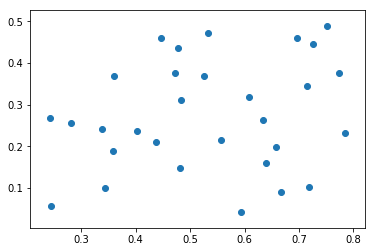

In [120]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [121]:
##选取初试中心
def initcenter(data,k):
    center=np.zeros([k,data.shape[1]])
    mins=data.min(0)
    maxs=data.max(0)
    ranges=maxs-mins
    
    a=random.sample(range(data.shape[0]),k)
    b=data[a,:]
    center=mins+ranges*b
    return center

In [122]:
def function_kmeans(data,k):
    m=np.shape(data)[0]
    #用来存放该样本属于哪类及质心距离
    cluster=np.zeros([m,2])
    
    center=initcenter(data,k)
    #用来判断聚类是否已经收敛
    change=True
    while change:
        change=False;
        for i in range(m):
            minDist = np.inf; minIndex = -1;
            for j in range(k):
                distJI =np.linalg.norm(center[j,:]-data[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j  
                    # 如果第i个数据点到第j个中心点更近，则将i归属为j
            if cluster[i,0] != minIndex: 
                change = True  
                # 如果分配发生变化，则需要继续迭代
            cluster[i,:] = minIndex,minDist**2   
            # 并将第i个数据点的分配情况存入字典
        print(center)
        for cent in range(k):   # 重新计算中心点
            ptsInClust = data[cluster[:,0] == cent]   
            # 取第一列等于cent的所有列
            center[cent,:] = np.mean(ptsInClust, axis = 0)  
            # 算出这些数据的中心点
    
    return center, cluster

In [123]:
center,cluster=function_kmeans(data,3)
print("聚类中心：",center)
print("分类结果：",cluster)

[[ 0.484286  0.247173]
 [ 0.563813  0.060774]
 [ 0.426399  0.149727]]
[[ 0.56447059  0.36211765]
 [ 0.67633333  0.13783333]
 [ 0.32742857  0.17971429]]
[[ 0.60307692  0.39407692]
 [ 0.65914286  0.14885714]
 [ 0.3492      0.2076    ]]
[[ 0.6005      0.40491667]
 [ 0.656       0.16325   ]
 [ 0.3492      0.2076    ]]
聚类中心： [[ 0.6005      0.40491667]
 [ 0.656       0.16325   ]
 [ 0.3492      0.2076    ]]
分类结果： [[  0.00000000e+00   1.23464236e-02]
 [  0.00000000e+00   3.09384236e-02]
 [  1.00000000e+00   1.06345625e-02]
 [  0.00000000e+00   7.61075694e-03]
 [  1.00000000e+00   1.26780625e-02]
 [  2.00000000e+00   3.75880000e-03]
 [  2.00000000e+00   2.08052000e-02]
 [  2.00000000e+00   7.72040000e-03]
 [  1.00000000e+00   5.32006250e-03]
 [  2.00000000e+00   1.48068000e-02]
 [  2.00000000e+00   3.35380000e-02]
 [  2.00000000e+00   1.18324000e-02]
 [  1.00000000e+00   2.94062500e-04]
 [  1.00000000e+00   1.20856250e-03]
 [  2.00000000e+00   2.64904000e-02]
 [  1.00000000e+00   1.86705625e-02

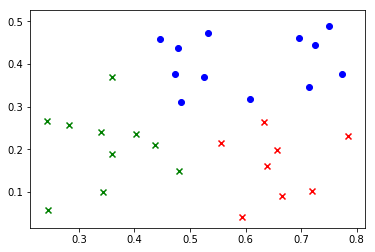

In [124]:
######图像展示
pos1=np.where(cluster[:,0]==0)
pos2=np.where(cluster[:,0]==1)
pos3=np.where(cluster[:,0]==2)
 
plt.scatter(data[pos1, 0], data[pos1, 1], marker='o', c='b')  
plt.scatter(data[pos2, 0], data[pos2, 1], marker='x', c='r')  
plt.scatter(data[pos3, 0], data[pos3, 1], marker='x', c='green')  
plt.show() 